<a href="https://colab.research.google.com/github/Susovan88/Machine_Learning/blob/main/Feature_Selection/ROC_and_PCA_and_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
data= pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [119]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
std_scaler=StandardScaler()
X_train=std_scaler.fit_transform(X_train)
X_test=std_scaler.transform(X_test)

print(X_train.shape,X_test.shape)

(614, 8) (154, 8)


In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [122]:
## apply KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(f'accuracy_score->{accuracy_score(y_test,y_pred)}')

accuracy_score->0.6948051948051948


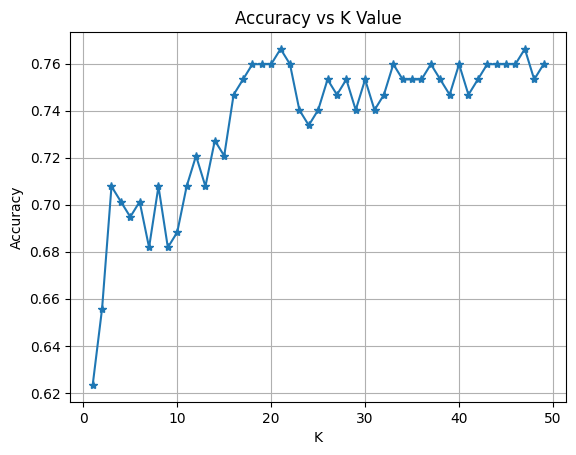

In [123]:
accuracy = []
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(range(1,50),accuracy,marker='*')
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [124]:
knn=KNeighborsClassifier(n_neighbors=21) ## best n_neighbors=21
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(f'accuracy_score->{accuracy_score(y_test,y_pred)}')

accuracy_score->0.7662337662337663


In [125]:
y_score=knn.predict_proba(X_test)[:,1]
y_score

array([0.38095238, 0.0952381 , 0.14285714, 0.42857143, 0.61904762,
       0.42857143, 0.        , 0.42857143, 0.57142857, 0.47619048,
       0.23809524, 0.57142857, 0.23809524, 0.47619048, 0.0952381 ,
       0.38095238, 0.0952381 , 0.0952381 , 0.47619048, 0.28571429,
       0.57142857, 0.04761905, 0.47619048, 0.        , 0.42857143,
       0.61904762, 0.19047619, 0.        , 0.        , 0.23809524,
       0.57142857, 0.52380952, 0.66666667, 0.42857143, 0.47619048,
       0.66666667, 0.71428571, 0.42857143, 0.28571429, 0.47619048,
       0.0952381 , 0.52380952, 0.33333333, 0.38095238, 0.14285714,
       0.47619048, 0.66666667, 0.14285714, 0.42857143, 0.80952381,
       0.        , 0.61904762, 0.85714286, 0.23809524, 0.14285714,
       0.04761905, 0.47619048, 0.0952381 , 0.38095238, 0.71428571,
       0.52380952, 0.19047619, 0.42857143, 0.52380952, 0.        ,
       0.28571429, 0.        , 0.52380952, 0.04761905, 0.57142857,
       0.71428571, 0.0952381 , 0.28571429, 0.        , 0.28571

In [126]:
# It helps you understand model performance across thresholds, not just at 0.5.
from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr,thresholds=roc_curve(y_test,y_score)
thresholds

array([       inf, 0.85714286, 0.80952381, 0.76190476, 0.71428571,
       0.66666667, 0.61904762, 0.57142857, 0.52380952, 0.47619048,
       0.42857143, 0.38095238, 0.33333333, 0.28571429, 0.23809524,
       0.19047619, 0.14285714, 0.0952381 , 0.04761905, 0.        ])

In [127]:
auc=roc_auc_score(y_test,y_score)   ## area under the curve
auc

np.float64(0.7922865013774105)

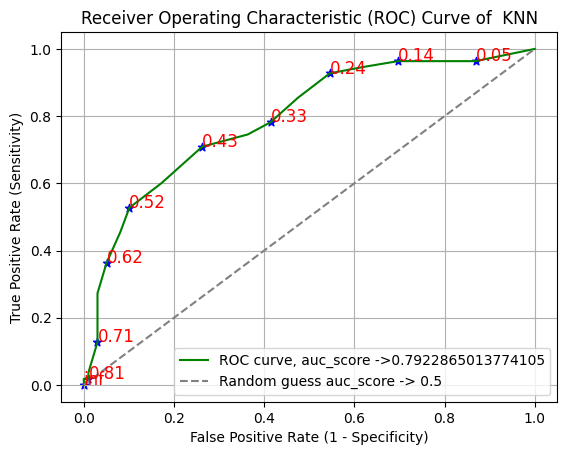

In [128]:
plt.plot(fpr, tpr, color='green', label=f'ROC curve, auc_score ->{auc}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess auc_score -> 0.5')

for i in range(0,len(thresholds),max(1,len(thresholds)//10)):
  plt.scatter(fpr[i],tpr[i],color='blue',marker='*')
  plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=12, color='red')

plt.title("Receiver Operating Characteristic (ROC) Curve of  KNN")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend()
plt.grid(True)
plt.show()

In [139]:
## apply LogisticRegression
L_reg=LogisticRegression(max_iter=100)
L_reg.fit(X_train,y_train)
y_pred=L_reg.predict(X_test)
print(f'accuracy_score->{accuracy_score(y_test,y_pred)}')

accuracy_score->0.7532467532467533


# **What predict_proba() returns**

It returns a 2D NumPy array of shape (n_samples, n_classes).

Each row corresponds to one test sample.

Each column gives the probability that the sample belongs to a particular class.

First column → probability of class 0

Second column → probability of class 1

In [130]:
L_reg.predict_proba(X_test)

array([[0.72263617, 0.27736383],
       [0.81404023, 0.18595977],
       [0.88534248, 0.11465752],
       [0.82860383, 0.17139617],
       [0.53156207, 0.46843793],
       [0.56005354, 0.43994646],
       [0.98380786, 0.01619214],
       [0.34044883, 0.65955117],
       [0.4638363 , 0.5361637 ],
       [0.22941719, 0.77058281],
       [0.74606101, 0.25393899],
       [0.10858721, 0.89141279],
       [0.6671275 , 0.3328725 ],
       [0.68711136, 0.31288864],
       [0.91465106, 0.08534894],
       [0.61368286, 0.38631714],
       [0.86059327, 0.13940673],
       [0.92345967, 0.07654033],
       [0.14219013, 0.85780987],
       [0.44478326, 0.55521674],
       [0.79158177, 0.20841823],
       [0.92091385, 0.07908615],
       [0.46879212, 0.53120788],
       [0.90456083, 0.09543917],
       [0.46502003, 0.53497997],
       [0.12011811, 0.87988189],
       [0.87554271, 0.12445729],
       [0.96894618, 0.03105382],
       [0.75198313, 0.24801687],
       [0.8805016 , 0.1194984 ],
       [0.

In [131]:
y_score=L_reg.predict_proba(X_test)[:,1] ## probability to get 1
y_score

array([0.27736383, 0.18595977, 0.11465752, 0.17139617, 0.46843793,
       0.43994646, 0.01619214, 0.65955117, 0.5361637 , 0.77058281,
       0.25393899, 0.89141279, 0.3328725 , 0.31288864, 0.08534894,
       0.38631714, 0.13940673, 0.07654033, 0.85780987, 0.55521674,
       0.20841823, 0.07908615, 0.53120788, 0.09543917, 0.53497997,
       0.87988189, 0.12445729, 0.03105382, 0.24801687, 0.1194984 ,
       0.90715973, 0.86727835, 0.75769995, 0.83300134, 0.62049806,
       0.6859238 , 0.96539288, 0.24975122, 0.5087476 , 0.72360145,
       0.07120025, 0.59431639, 0.58176342, 0.33064973, 0.02881938,
       0.50697619, 0.65016588, 0.22505347, 0.36974282, 0.95579301,
       0.04959779, 0.66377551, 0.8097042 , 0.24806187, 0.09427575,
       0.04265584, 0.77095657, 0.00599514, 0.41303377, 0.74746918,
       0.73572228, 0.34807356, 0.20057534, 0.21605177, 0.07785928,
       0.61718538, 0.05196959, 0.7259848 , 0.03900445, 0.71522747,
       0.67587109, 0.07200265, 0.18294234, 0.11486192, 0.09280

roc_curve give us ->

fpr → False Positive Rate values

tpr → True Positive Rate values

thresholds → cutoff probability values used to calculate them

In [132]:
# It helps you understand model performance across thresholds, not just at 0.5.
from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr,thresholds=roc_curve(y_test,y_score)
thresholds

array([       inf, 0.96899763, 0.96539288, 0.95579301, 0.89684783,
       0.89141279, 0.77640464, 0.77058281, 0.72817487, 0.72781826,
       0.72360145, 0.71623999, 0.6859238 , 0.67587109, 0.66377551,
       0.65955117, 0.65016588, 0.64444918, 0.64335719, 0.61718538,
       0.61271861, 0.57220152, 0.5398912 , 0.5087476 , 0.50697619,
       0.42336033, 0.418227  , 0.41303377, 0.38631714, 0.3368774 ,
       0.33064973, 0.31288864, 0.30979234, 0.2607042 , 0.23994008,
       0.23375693, 0.22649942, 0.21832043, 0.21605177, 0.16821982,
       0.14834059, 0.13940673, 0.13608407, 0.1194984 , 0.11486192,
       0.04265584, 0.04159967, 0.00438511])

In [133]:
auc=roc_auc_score(y_test,y_score)   ## area under the curve
auc

np.float64(0.8146923783287419)

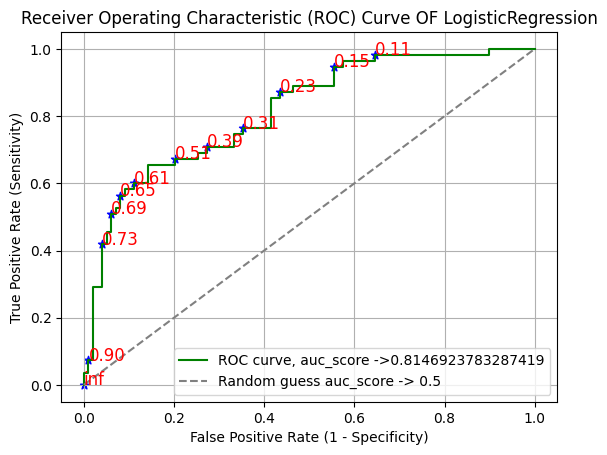

In [134]:
plt.plot(fpr, tpr, color='green', label=f'ROC curve, auc_score ->{auc}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess auc_score -> 0.5')

for i in range(0,len(thresholds),max(1,len(thresholds)//10)):
  plt.scatter(fpr[i],tpr[i],color='blue',marker='*')
  plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=12, color='red')

plt.title("Receiver Operating Characteristic (ROC) Curve OF LogisticRegression")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend()
plt.grid(True)
plt.show()


In [145]:
## apply PCA
from sklearn.decomposition import PCA

X=data.drop('Outcome',axis=1)
y=data['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
std_scaler=StandardScaler()
X_train=std_scaler.fit_transform(X_train)
X_test=std_scaler.transform(X_test)

pca=PCA(n_components=2)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [147]:
import plotly.express as px

# Convert y_train to string for categorical coloring
y_train_trf = y_train.astype(str)

# Use a good color sequence (categorical)
fig = px.scatter(
    x=X_train_new[:, 0],
    y=X_train_new[:, 1],
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.Set1,  # ✅ bright & distinct
    title="2D Feature Scatter Plot",
    labels={'x': 'Feature 1', 'y': 'Feature 2', 'color': 'Class'}
)

fig.update_layout(
    template='plotly_white',
    legend_title_text='Target Class',
    title_x=0.5,
    title_font=dict(size=18)
)

fig.show()


In [148]:
L_reg=LogisticRegression(max_iter=100)
L_reg.fit(X_train_new,y_train)
y_pred=L_reg.predict(X_test_new)
print(f'accuracy_score->{accuracy_score(y_test,y_pred)}')

accuracy_score->0.7077922077922078
